In [ ]:
# import all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from prettytable import PrettyTable

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/madhurendra1/machine-learning/main/income_evaluation.csv")   # read the dataset

In [ ]:
data.shape         # shape of the dataset

(32561, 15)

In [ ]:
data.columns         # columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
data.head()     # first 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.sample(5)     # random 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27390,42,Private,146659,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,50,United-States,>50K
18451,70,Private,206232,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,<=50K
4882,29,Private,206351,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,5013,0,40,United-States,<=50K
1296,21,Private,236696,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,57,United-States,<=50K
2791,55,Private,92215,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.info()                 # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.isnull().sum()    # count the number of null value present in the dataset

# conclusion: No null value present in the dataset

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
# Average age for income less than 50k

print("Male average age for income less than 50K: ", data[(data[' sex']==' Male') | (data[' income']==' >50K')]['age'].mean())
print("Female average agefor income less than 50K: ", data[(data[' sex']==' Female') | (data[' income']==' >50K')]['age'].mean())
print("Average age for income less than 50K: ", data[data[' income']==' >50K']['age'].mean())

Male average age for income less than 50K:  39.57172711045322
Female average agefor income less than 50K:  39.826593242700625
Average age for income less than 50K:  44.24984058155847


In [ ]:
# Average age for income greater than 50k

print("Male average age for income greater than 50K: ", data[(data[' sex']==' Male') | (data[' income']==' <=50K')]['age'].mean())
print("Female average agefor income greater than 50K: ", data[(data[' sex']==' Female') | (data[' income']==' <=50K')]['age'].mean())
print("Average age for income greater than 50K: ", data[data[' income']==' <=50K']['age'].mean())

Male average age for income greater than 50K:  38.44850551271429
Female average agefor income greater than 50K:  37.02691223599367
Average age for income greater than 50K:  36.78373786407767


## Label Encoding

In [ ]:
columns = [' workclass', ' education',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' hours-per-week', ' native-country',
       ]
       
label_encoder = LabelEncoder()
 
for col in columns:
    data[col]= label_encoder.fit_transform(data[col])       


# After label encoding
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,39,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,12,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,39,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,39,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,39,5,<=50K


In [ ]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,39.377937,36.718866
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.144006,7.823782
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,39.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,93.000000,41.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


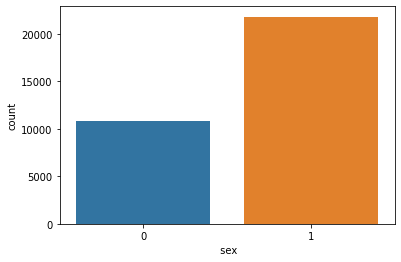

In [ ]:
sns.countplot(data[' sex'])   # countplot for sex

#conclusion: number of male greater than female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Shape of <=50k :  (24720, 15)

Shape of >50k :  (7841, 15)


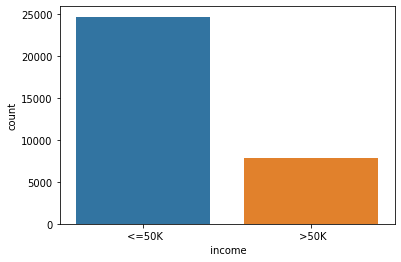

In [ ]:
sns.countplot(data[' income'])
incomeGreaterThan50k = data[data[' income']==' <=50K']
incomeLessThan50k = data[data[' income']==' >50K']

print('Shape of <=50k : ', incomeGreaterThan50k.shape)
print('\nShape of >50k : ', incomeLessThan50k.shape)

sns.countplot(data=data, x = ' income',label='Count')

## Splitting the dataset into train(80%) and test set(20%)


In [ ]:
# dependentVariable: 'income'
dependentVariable = ' income'

X = data.drop([dependentVariable], axis=1)

y = data[dependentVariable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (22792, 14)
X_test (9769, 14)
y_train (22792,)
y_test (9769,)


## k-nearest neighbors

### For manhattan_distance

In [ ]:
neighbors = [i for i in range(1,31) if i%2==1]             
manhattanAccuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k, p = 1)
    Knn_classifier.fit(X_train, y_train)
    manhattanAccuracy.append(accuracy_score(y_test, Knn_classifier.predict(X_test))*100)

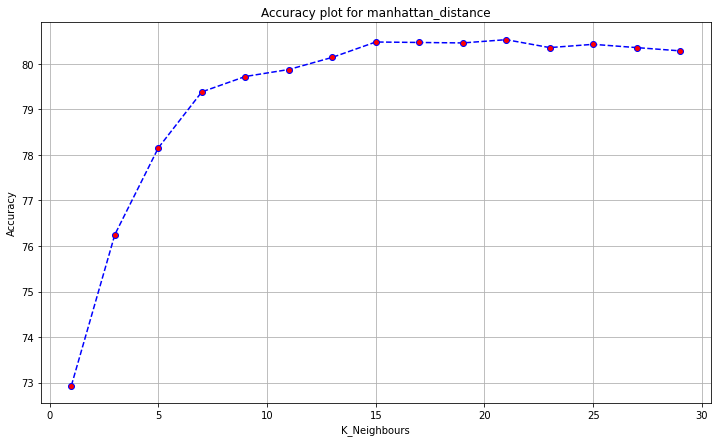

In [ ]:
plt.rcParams["figure.figsize"]=12,7
plt.plot(neighbors, manhattanAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')  
plt.title("Accuracy plot for manhattan_distance") 
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()

Conclusion: for manhatton distance when k=21 classifier gives maximum accuracy

In [ ]:
neighbors = [i for i in range(1,31) if i%2==1]             
ecludienAccuracy=[]
for k in neighbors:    
    Knn_classifier = KNeighborsClassifier(n_neighbors=k, p = 2)
    Knn_classifier.fit(X_train, y_train)
    ecludienAccuracy.append(accuracy_score(y_test, Knn_classifier.predict(X_test))*100)

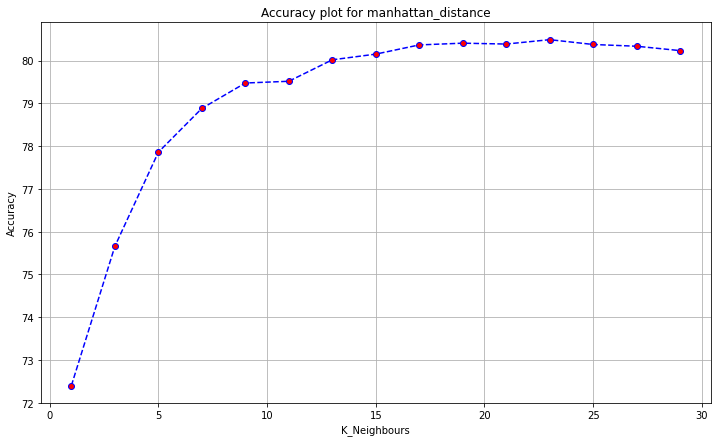

In [ ]:
plt.rcParams["figure.figsize"]=12,7
plt.plot(neighbors, ecludienAccuracy, color='blue',linestyle='dashed', marker='o', markerfacecolor='red')  
plt.title("Accuracy plot for manhattan_distance") 
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()

conclusion: for euclidean_distance when k=23 classifier gives maximum accuracy

### Compare euclidean_distance and manhattan_distance 

In [ ]:
myTable = PrettyTable(["Distance Name", "K", "Accuracy"]) 

for i in range(len(ecludienAccuracy)):
    myTable.add_row(["Ecludien", neighbors[i], ecludienAccuracy[i]])

for i in range(len(manhattanAccuracy)):
    myTable.add_row(["Manhattan", neighbors[i], manhattanAccuracy[i]])

print(myTable)

+---------------+----+-------------------+
| Distance Name | K  |      Accuracy     |
+---------------+----+-------------------+
|    Ecludien   | 1  | 72.40249769679599 |
|    Ecludien   | 3  |  75.6576927014024 |
|    Ecludien   | 5  | 77.85853209130924 |
|    Ecludien   | 7  |  78.8821783191729 |
|    Ecludien   | 9  |  79.4758931313338 |
|    Ecludien   | 11 | 79.51683898044836 |
|    Ecludien   | 13 | 80.01842563210154 |
|    Ecludien   | 15 | 80.15149964172382 |
|    Ecludien   | 17 |  80.3664653495752 |
|    Ecludien   | 19 | 80.40741119868974 |
|    Ecludien   | 21 | 80.38693827413246 |
|    Ecludien   | 23 | 80.48930289691883 |
|    Ecludien   | 25 | 80.37670181185382 |
|    Ecludien   | 27 | 80.33575596273927 |
|    Ecludien   | 29 |  80.2333913399529 |
|   Manhattan   | 1  | 72.93479373528508 |
|   Manhattan   | 3  | 76.25140751356331 |
|   Manhattan   | 5  |  78.1553894973897 |
|   Manhattan   | 7  | 79.38376497082609 |
|   Manhattan   | 9  | 79.72156822602109 |
|   Manhatt

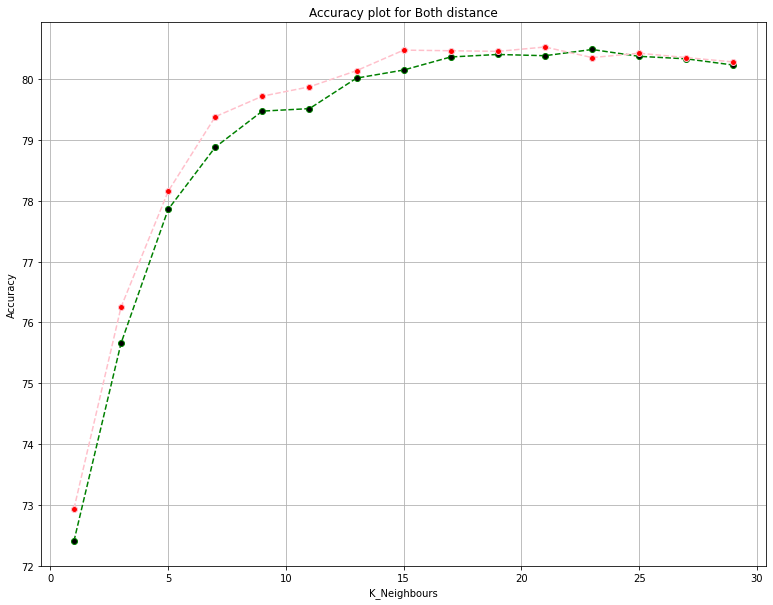

In [ ]:
plt.rcParams["figure.figsize"]=13,10

plt.plot(neighbors, ecludienAccuracy, color='green',linestyle='dashed', marker='o', markerfacecolor='black', label="Precision")
plt.plot(neighbors, manhattanAccuracy, color='pink',linestyle='dashed', marker='o', markerfacecolor='red', label="Recall")
plt.title("Accuracy plot for Both distance") 
plt.xlabel('K_Neighbours')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Conclusion: when distance is manhattan and k=21 KNN gives maximum accuracy

In [ ]:
KnnClassifier = KNeighborsClassifier(n_neighbors=21, p=1)
KnnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21, p=1)


Acuracy of KNN classifier for test set:  80.53024874603338

Classification Report for test case : 
               precision    recall  f1-score   support

       <=50K       0.80      0.99      0.89      7455
        >50K       0.85      0.22      0.35      2314

    accuracy                           0.81      9769
   macro avg       0.83      0.60      0.62      9769
weighted avg       0.81      0.81      0.76      9769


Confusion Matrix for test case : 
 [[7366   89]
 [1813  501]]

Confusion Matrix Heatamp for test case: 


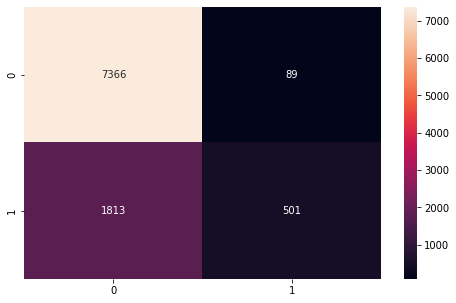

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("\nAcuracy of KNN classifier for test set: ", accuracy_score(y_test, KnnClassifier.predict(X_test))*100)
print('\nClassification Report for test case : \n', classification_report(y_test, KnnClassifier.predict(X_test)))
print("\nConfusion Matrix for test case : \n", confusion_matrix(y_test, KnnClassifier.predict(X_test)))
print('\nConfusion Matrix Heatamp for test case: ')
sns.heatmap(confusion_matrix(y_test, KnnClassifier.predict(X_test)), annot=True, fmt='d')

Acuracy of KNN classifier for train set:  80.22551772551772

Classification Report for train set : 
               precision    recall  f1-score   support

       <=50K       0.80      0.99      0.88     17265
        >50K       0.85      0.22      0.35      5527

    accuracy                           0.80     22792
   macro avg       0.83      0.61      0.62     22792
weighted avg       0.81      0.80      0.75     22792


Confusion Matrix for train set : 
 [[17052   213]
 [ 4294  1233]]

Confusion Matrix Heatamp for train set: 


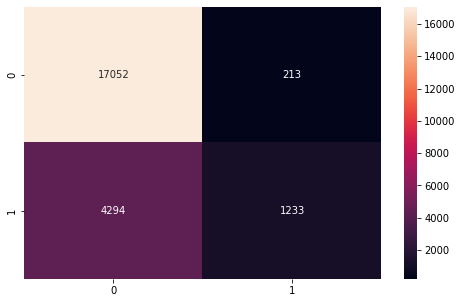

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("Acuracy of KNN classifier for train set: ", accuracy_score(y_train, KnnClassifier.predict(X_train))*100)
print('\nClassification Report for train set : \n', classification_report(y_train, KnnClassifier.predict(X_train)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(y_train, KnnClassifier.predict(X_train)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(y_train, KnnClassifier.predict(X_train)), annot=True, fmt='d')

In [ ]:
plt.rcParams["figure.figsize"]=8,5
print("Acuracy of KNN classifier for train set: ", accuracy_score(train_y, KnnClassifier.predict(train_X))*100)
print('\nClassification Report for train set : \n', classification_report(train_y, KnnClassifier.predict(train_X)))
print("\nConfusion Matrix for train set : \n", confusion_matrix(train_y, KnnClassifier.predict(train_X)))
print('\nConfusion Matrix Heatamp for train set: ')
sns.heatmap(confusion_matrix(train_y, KnnClassifier.predict(train_X)), annot=True, fmt='d')

NameError: ignored